# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

More specifically, we'll look at the following topics.

* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="../images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [25]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Mon May 13 00:16:58 2024


## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [3]:
df = pd.read_csv("../../data/heart-disease.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(303, 14)

## Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [5]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df.target.values

Let's see our new variables.

In [6]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
# Targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [8]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [10]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64),
 242)

Beautiful, we can see we're using 242 samples to train on. Let's look at our test data.

In [11]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [12]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 61)

And we've got 61 examples we'll test our model(s) on. Let's build some.

In [24]:
model = LogisticRegression()

model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
model_parameters = model._parameter_constraints

print(f"Score is: {model_score}")
print(model_parameters)

Score is: 0.8852459016393442
{'penalty': [<sklearn.utils._param_validation.StrOptions object at 0x0000027F2F393C70>, None], 'dual': ['boolean'], 'tol': [<sklearn.utils._param_validation.Interval object at 0x0000027F2F393DC0>], 'C': [<sklearn.utils._param_validation.Interval object at 0x0000027F2F393D90>], 'fit_intercept': ['boolean'], 'intercept_scaling': [<sklearn.utils._param_validation.Interval object at 0x0000027F2F458AF0>], 'class_weight': [<class 'dict'>, <sklearn.utils._param_validation.StrOptions object at 0x0000027F2F458B50>, None], 'random_state': ['random_state'], 'solver': [<sklearn.utils._param_validation.StrOptions object at 0x0000027F2F458BE0>], 'max_iter': [<sklearn.utils._param_validation.Interval object at 0x0000027F2F458C40>], 'multi_class': [<sklearn.utils._param_validation.StrOptions object at 0x0000027F2F458C70>], 'verbose': ['verbose'], 'warm_start': ['boolean'], 'n_jobs': [None, <class 'numbers.Integral'>], 'l1_ratio': [<sklearn.utils._param_validation.Interval 

d:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Our model has an 88.5% accuracy. This may be enough, but we set our eyes on a >95% accuracy. 

To reach this benchmark, we either
- Carry out hyperparameter tuning of our model or
- Test out other models to see how they do

For the case of this class, we will do the latter

We'll be using and comparing the following models
1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

| <img src="../../images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png" alt="an example classification path using the Scikit-Learn machine learning model map" width=500/> | 
|:--:| 
| An example path we can take using the Scikit-Learn Machine Learning Map |

In [26]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(
    models=models, X_train=X_train, X_test=X_test,
    y_train=y_train, y_test=y_test
)
model_scores

d:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

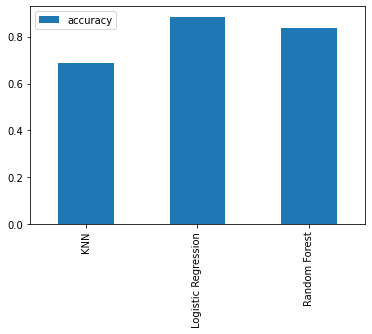

In [29]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();